In [1]:
%matplotlib inline
import pandas as pd
import os
import json
from copy import deepcopy
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import dgl
from dgl.data.utils import save_graphs, load_graphs
from networkx.algorithms.distance_measures import diameter

# Initialize the SIR epidemic model.
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

Using backend: pytorch


Processing sample 0
0       [1, 2, 8, 10, 17, 11, 6, 3, 2, 1, 1, 1, 1, 0]
3             [1, 1, 1, 4, 17, 22, 14, 6, 5, 1, 1, 0]
6                     [1, 2, 13, 28, 19, 10, 4, 2, 0]
9                   [2, 5, 14, 29, 10, 4, 2, 1, 1, 0]
12                       [1, 2, 18, 28, 15, 10, 2, 0]
                            ...                      
2985               [1, 2, 13, 23, 23, 10, 4, 3, 2, 0]
2988                      [1, 1, 6, 21, 24, 10, 2, 0]
2991                          [1, 3, 9, 25, 20, 7, 0]
2994            [1, 3, 12, 24, 22, 16, 4, 3, 2, 1, 0]
2997                      [1, 5, 11, 21, 17, 9, 4, 0]
Name: I, Length: 1000, dtype: object


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

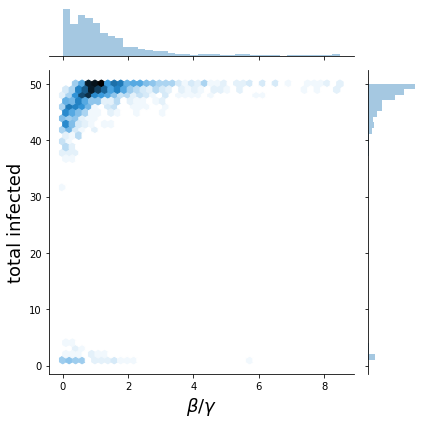

In [57]:
# NB!
# parameters to obtain example of multimodality given a family of grpahs: 0.01, 200, 0.01
family_name = 'barabasi_albert'        
folder = Path(f'{family_name}')
no_graph_samples = 100
for no_edge in [2]:#, 5, 10, 20]:
    for graph_size in [50]:#, 50, 100, 200, 500, 1000]:
        if no_edge < graph_size:
            graphs_folder = folder / Path(f'graphs_size{graph_size}_noedge{int(no_edge)}')
            
            R0_s = []
            infected_s = []
            for graph_sample in range(no_graph_samples):  
                print('Processing sample', graph_sample)
                json_filepath = str(Path(graphs_folder, f'data_{graph_sample}.json'))
                graph_filename = graphs_folder / Path(f'sample{graph_sample}.bin')

                
                try:
                    # graph = load_graphs(str(graph_filename))
                    with open(json_filepath, 'r') as f:
                        data = json.load(f)

                    simulations = data['graph_samples'][0]['simulations']  # only one element in this list
                    simulations = simulations
                    df = pd.DataFrame(simulations)

                    for initial_probability_of_infection in [0.01]:#, 0.05, 0.1]:
                        filtered = df[df['init_infection_prob']==initial_probability_of_infection]
                        print(filtered['I'])
                        R0_s.extend(filtered['R0'])
                        infected_s.extend(filtered['total_infected'])
                    break
                except Exception as e:
                    print(e)
            
            data = {r'$R0=\gamma/\beta$': R0_s,
                    'total infected': infected_s}
            df = pd.DataFrame(data, columns=[r'$R0=\gamma/\beta$', 'total infected'])
            h = sns.jointplot(r'$R0=\gamma/\beta$', 'total infected', data=data, kind="hex")
                        # JointGrid has a convenience function
            h.set_axis_labels(r'$\beta/\gamma$', 'total infected', fontsize=18)
            plt.tight_layout()
            plt.savefig(f'distrib_infected_barabasi_albert_{graph_size}_{no_edge}.eps')
            #debug
            break
        # debug
        break
    # debug
    break


Processing sample 0
0       [2, 3, 5, 6, 9, 10, 14, 26, 31, 39, 37, 27, 17...
3       [1, 1, 1, 3, 7, 11, 14, 27, 37, 34, 28, 18, 20...
6                                               [1, 2, 0]
9       [1, 5, 4, 6, 5, 6, 6, 7, 11, 15, 13, 14, 11, 1...
12                            [2, 4, 2, 2, 1, 1, 2, 1, 0]
                              ...                        
2985    [3, 6, 14, 20, 26, 33, 34, 26, 28, 20, 17, 10,...
2988    [2, 5, 6, 16, 29, 30, 29, 25, 18, 14, 12, 8, 3...
2991    [1, 3, 4, 7, 7, 3, 2, 3, 4, 8, 10, 22, 19, 14,...
2994    [1, 2, 3, 4, 6, 4, 7, 16, 19, 22, 23, 13, 10, ...
2997    [3, 7, 8, 12, 22, 32, 45, 46, 30, 18, 15, 9, 7...
Name: I, Length: 1000, dtype: object


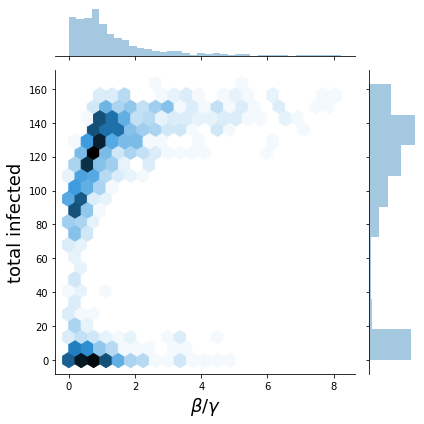

In [2]:
# NB!
# parameters to obtain example of multimodality given a family of grpahs: 0.01, 200, 0.01
family_name = '../erdos_renyi'        
folder = Path(f'{family_name}')
no_graph_samples = 100
for no_edge in [0.01]:#, 0.05, 0.1, 0.2]:
    for graph_size in [200]:#, 50, 100, 200, 500, 1000]:
        if no_edge < graph_size:
            graphs_folder = folder / Path(f'graphs_size{graph_size}_p{str(no_edge)}')
            
            R0_s = []
            infected_s = []
            for graph_sample in range(no_graph_samples):  
                print('Processing sample', graph_sample)
                json_filepath = str(Path(graphs_folder, f'data_{graph_sample}.json'))
                graph_filename = graphs_folder / Path(f'sample{graph_sample}.bin')
                
                
                try:
                    # graph = load_graphs(str(graph_filename))
                    with open(json_filepath, 'r') as f:
                        data = json.load(f)

                    simulations = data['graph_samples'][0]['simulations']  # only one element in this list
                    simulations = simulations
                    df = pd.DataFrame(simulations)

                    for initial_probability_of_infection in [0.01]:#, 0.05, 0.1]:
                        filtered = df[df['init_infection_prob']==initial_probability_of_infection]
                        print(filtered['I'])
                        R0_s.extend(filtered['R0'])
                        infected_s.extend(filtered['total_infected'])
                    break
                except Exception as e:
                    print(e)
            
            data = {r'$R0=\gamma/\beta$': R0_s,
                    'total infected': infected_s}
            df = pd.DataFrame(data, columns=[r'$R0=\gamma/\beta$', 'total infected'])
            h = sns.jointplot(r'$R0=\gamma/\beta$', 'total infected', data=data, kind='hex', space=0)
            
            # JointGrid has a convenience function
            h.set_axis_labels(r'$\beta/\gamma$', 'total infected', fontsize=18)
            plt.tight_layout()
            #plt.savefig(f'distrib_infected_erdos_renyi_{graph_size}_{no_edge}.eps')
            
            
                
            #debug
            break
        # debug
        break
    # debug
    break

## Analyze diameter of a certain dataset

In [ ]:
# NB!
# parameters to obtain example of multimodality given a family of grpahs: 0.01, 200, 0.01
family_name = 'barabasi_albert'        
folder = Path(f'{family_name}')
no_graph_samples = 100
for no_edge in [2, 5, 10, 20]:
    for graph_size in [100, 50, 100, 200, 500, 1000]:
        if no_edge < graph_size:
            
            diameters = []
            
            graphs_folder = folder / Path(f'graphs_size{graph_size}_noedge{int(no_edge)}')
            
            for graph_sample in range(no_graph_samples):  
                json_filepath = str(Path(graphs_folder, f'data_{graph_sample}.json'))
                graph_filename = graphs_folder / Path(f'sample{graph_sample}.bin')

                
                try:
                    graph = load_graphs(str(graph_filename))[0][0].to_networkx()
                    diameters.append(diameter(graph))
                    '''
                    with open(json_filepath, 'r') as f:
                        data = json.load(f)

                    simulations = data['graph_samples'][0]['simulations']  # only one element in this list
                    simulations = simulations[::100]
                    df = pd.DataFrame(simulations)

                    for initial_probability_of_infection in [0.01]:#, 0.05, 0.1]:
                        filtered = df[df['init_infection_prob']==initial_probability_of_infection]
                        print(filtered['I'])
                        R0_s.extend(filtered['R0'])
                        infected_s.extend(filtered['total_infected'])
                    '''
                except Exception as e:
                    print(e)
                 
            plt.figure()
            sns.distplot(diameters, kde=False)    
            plt.title(f'Diameter histogram, size {graph_size} no edges {no_edge}')
            plt.tight_layout()
            if not os.path.exists('diameter_barabasi_albert'):
                os.makedirs('diameter_barabasi_albert')
            plt.savefig(f'diameter_barabasi_albert/diameter_{graph_size}_{no_edge}.eps')
            plt.close()
                
            #debug
        # debug
    # debug